In [1]:
import sys
sys.path.append('/home/svdcvt/miniconda3/lib/python3.8/site-packages')
import tinkhorn
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# K_full = lambda bins, beta: np.exp(- cdist(bins, bins) / beta)
# C = lambda K, beta: - np.log(K) * beta
# gamma = lambda a, b, K: a.reshape(-1, 1) * K * b
# mapping = lambda a, b, K, beta: np.argmin(gamma(a, b, K).dot(C(K, beta)), 1)

In [3]:
N = 100000
square = (np.random.rand(N, 2) * 2 - 1)*10
rho = np.sqrt(np.random.rand(N))
phi = np.random.uniform(0, 2 * np.pi, N)
shape = np.vstack([rho * np.cos(phi), rho * np.sin(phi)]).T
A, B = 0.7, 0.3
r = A + B * np.cos(3 * phi)
shape = 10*np.vstack([(A + B*np.cos(3*phi))*np.cos(phi), (A + B*np.cos(3*phi))*np.sin(phi)]).T

In [4]:
allpoints = np.vstack([shape, np.array([[1,  1],
                                       [ 1, -1],
                                       [-1,  1],
                                       [-1, -1]])*10])

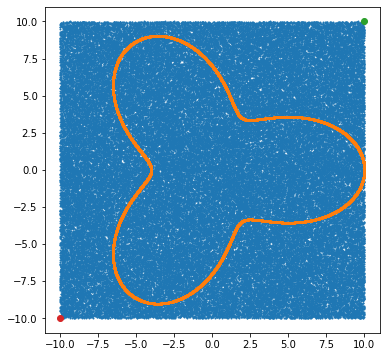

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(square[:,0], square[:,1], s=1)
plt.scatter(shape[:,0], shape[:,1], s=1)
plt.scatter(*allpoints.max(0))
plt.scatter(*allpoints.min(0))
plt.show()

In [6]:
xmin, ymin, xmax, ymax = *allpoints.min(0), *allpoints.max(0)
borders = np.array([[xmin, ymin],
                    [xmin, ymax],
                    [xmax, ymin],
                    [xmax, ymax]])

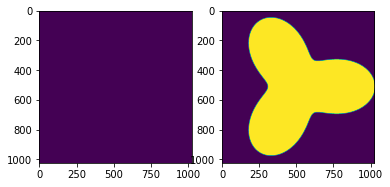

In [7]:
plt.subplot(121)
plt.imshow(p)
plt.subplot(122)
plt.imshow(q)
plt.show()

NameError: name 'bins' is not defined

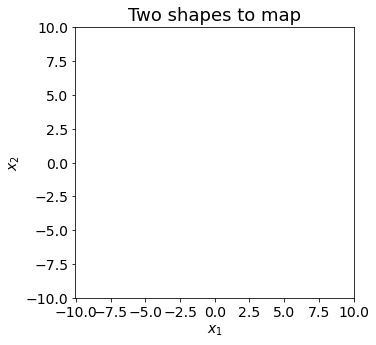

In [7]:
plt.figure(figsize=(5,5))
plt.title('Two shapes to map',
             fontsize=18)
plt.xlabel('$x_1$', fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(xmin-0.05, xmax+0.05)
plt.ylabel('$x_2$', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(ymin-0.05, ymax+0.05)
plt.scatter(bins[c1, 0], bins[c1, 1], s=20, label='square')
plt.scatter(bins[c2, 0], bins[c2, 1], s=20, label=shape)
plt.legend(fontsize=14, loc='upper right')
# plt.savefig(f'two_shapes_square_to_{shape}.png')
plt.show()

In [8]:
# without clouds 2D
binsize = 128
# shape = 'circle'
shape = 'flower'
fname = f'square_to_{shape}.pdf'

bins, p, q = tinkhorn.binning(borders, borders, binsize)
x, y = bins[:, 0], bins[:, 1]

# square
p = np.zeros_like(p).ravel()
c1 = (np.abs(x) <= 10) * (np.abs(y) <= 10)
m = c1.sum()
p[c1] = 1 / m
p = p.reshape(binsize, binsize)

# shape
if shape == 'circle':
    c2 = (x ** 2 + y ** 2 < 90)
elif shape == 'flower':
    phi = np.arctan2(y, x)
    c2 = (A + B * np.cos(3 * np.arctan2(y,x)))*10 > np.sqrt(x ** 2 + y ** 2) 
    
m = c2.sum()
q = np.zeros_like(q).ravel()
q[c2] = 1 / m 
q = q.reshape(binsize, binsize)

# np.save(f'C_bins_{binsize}.npy', cdist(bins, bins))
np.save(f'bins_{shape}_{binsize}.npy', bins)
np.save(f'p_{shape}_{binsize}.npy', p)
np.save(f'q_{shape}_{binsize}.npy', q)


X, Y = bins[p.ravel() > 0], bins[q.ravel() > 0]

Starting iterative process
#iterations=10,  err=2.68397e-18, 18.802ms per iteration
Finished


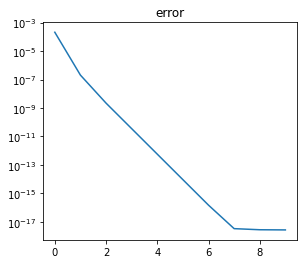

In [9]:
beta = 0.7
num_iter = 10
method = 'toeplitz'
K, a, b, _, _, _ = tinkhorn.sinkhorn_toeplitz(p, q, bin_size=bins, beta=beta, 
                                              max_iter=num_iter, plot=1,
                                              store_full=False, store_err=True, 
                                              early_stopping=True, eps=1e-20, tol=1e-20,
#                                               early_stopping=False
                                             )

In [10]:
np.save(f'K_{method}.npy', K)
np.save(f'a_{method}.npy', a)
np.save(f'b_{method}.npy', b)

#iterations=10,  err=1.13903e-18, 128.322ms per iteration
Finished


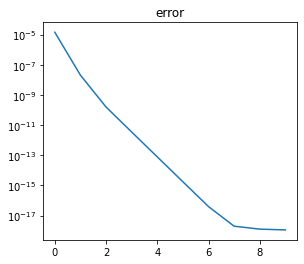

In [11]:
method = 'sinkhorn'
# beta=0.05
K, a, b = tinkhorn.sinkhorn(X, Y, beta=beta, max_iter=10, 
                            early_stopping=False, 
#                             store_err=False, 
                            plot_mat=False, verbose=True, plot_err=1)

In [12]:
K.shape, a.shape, b.shape

((16384, 6896), (16384,), (6896,))

In [13]:
np.save(f'K_{method}.npy', K)
np.save(f'a_{method}.npy', a)
np.save(f'b_{method}.npy', b)

In [ ]:
# C_ = np.load(f'C_bins_{binsize}.npy', allow_pickle=True)

# if method == 'sinkhorn_toeplitz':
#     K_full = np.exp(-C_/beta)
#     g = a.reshape(-1, 1) * K_full * b[q.ravel()>0]
#     tmp = (g)[p.ravel()>0].dot(C_[q.ravel()>0])
#     transport = np.argmin(tmp, 1)
    
# #     K = K_full(bins, beta)
# #     transport = mapping(a, b, K, beta)

#     xbins, ybins = bins[p.ravel() > 0], bins[q.ravel() > 0]
#     hat_xbins = ybins[transport]#[p.ravel() > 0]
# elif method == 'sinkhorn':
#     g = (a.reshape(-1, 1) * K * b)
#     transport = np.argmin(g.dot(C_[q.ravel() > 0]), -1)

#     xbins, ybins = X, Y 
#     hat_xbins = Y[transport]

In [ ]:
plot_map()

NameError: name 'ybins' is not defined

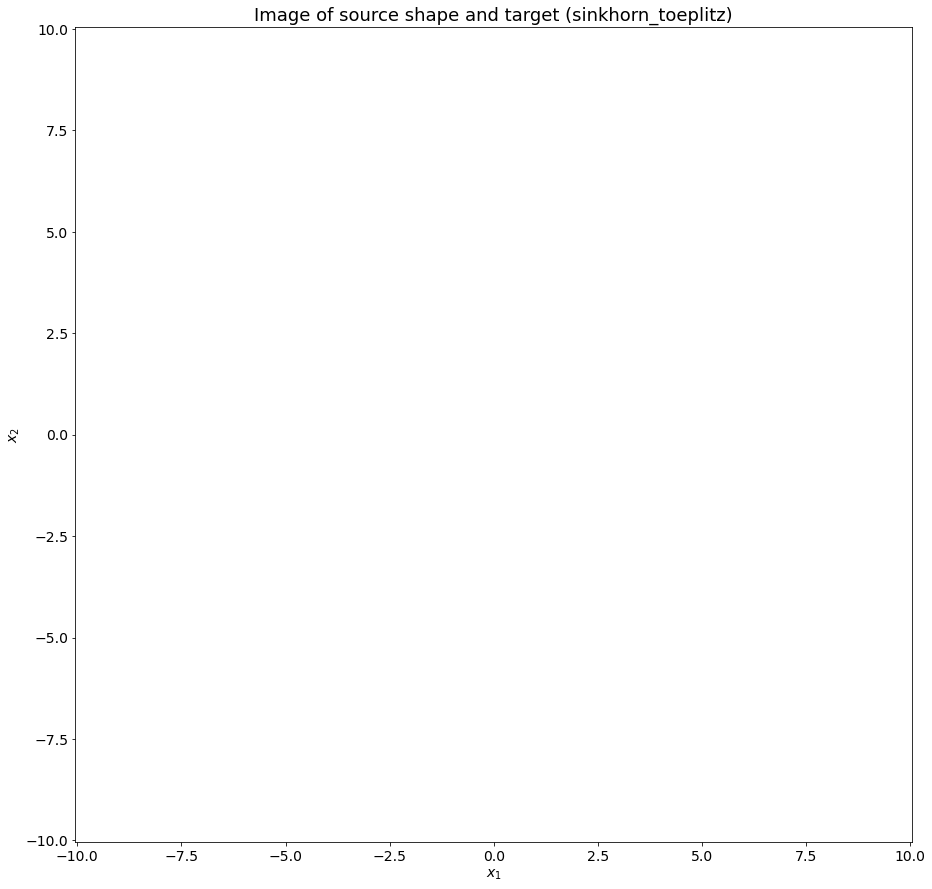

In [25]:
plot_image()

In [2]:
hat_xbins_2 = bins[:, :]
hat_xbins_2[p.ravel()>0] = hat_xbins

NameError: name 'bins' is not defined

In [69]:
hat_xbins = np.load(f'source_image_{shape}_{binsize}.npy', allow_pickle=True)

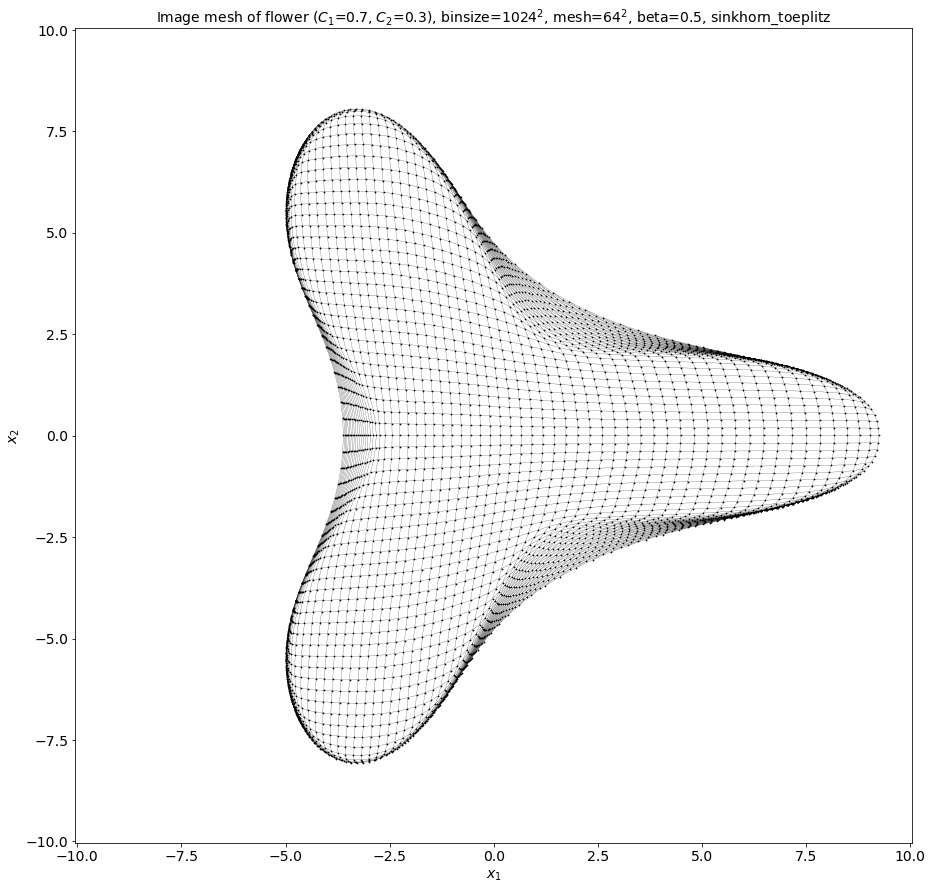

In [72]:
plot_mesh(points=hat_xbins, distribution=p, fname=fname, every=16, dots=0.5)

In [105]:
import sys
from PIL import Image

import os
from pathlib import Path

from datetime import datetime

dt_string = datetime.now().strftime("%d_%m_%Y_%H_%M")

files = [x for x in Path().iterdir() if f'{method}_{binsize}_{beta}_{fname}' in x.name]
files.sort(key=os.path.getctime)

images = [Image.open(x.name) for x in files]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save(f'report_{method}_{binsize}_{beta}_{dt_string}.jpg')

## 3D (cube and sphere surface)

In [73]:
N = 60000
cube = []
for i in range(3):
    for x in [-1, +1]:
        f = np.random.rand(N // 6, 2) * 2 - 1
        cube.append(np.insert(f, i, x, axis=1))
cube = np.vstack(cube)
        
theta = np.random.uniform(0, 2 * np.pi, N)
phi = np.random.uniform(0, np.pi, N)
r = 1
x = r * np.cos(theta) * np.sin(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(phi)
sphere = np.vstack([x, y, z]).T

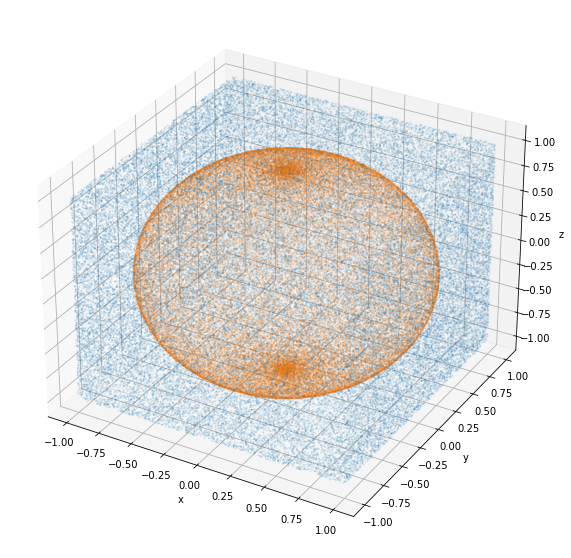

In [74]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], s=1, alpha=0.1, label='cube surface')
ax.scatter(sphere[:, 0], sphere[:, 1], sphere[:, 2], s=1, alpha=0.1, label='sphere surface')
plt.show()

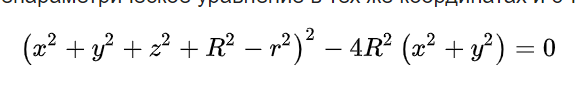

In [471]:
# without clouds 3D
shape = 'sphere'
# shape = 'tor'
binsize = 128


borders = np.array(np.meshgrid([-1, 1], [-1, 1], [-1, 1])).reshape(-1, 3)
bins, p, q = tinkhorn.binning(borders, borders, binsize)
if shape == 'sphere':
    summ_bins = bins[:,0]**2 + bins[:, 1]**2 + bins[:,2]**2
    is_shape = summ_bins <= 1
elif shape == 'tor':
    summ_bins = (bins[:,0]**2 + bins[:, 1]**2 + bins[:,2]**2 + 0.7**2 - 0.3**2)**2 - 4 * 0.7**2*(bins[:,0]**2 + bins[:, 1]**2)
    is_shape = summ_bins <= 0

p = np.zeros_like(p).ravel()
p[:] = 1 / len(bins)
p = p.reshape(binsize, binsize, binsize)
q = np.zeros_like(q).ravel()
q[is_shape] = 1 / is_shape.sum()
q = q.reshape(binsize, binsize, binsize)

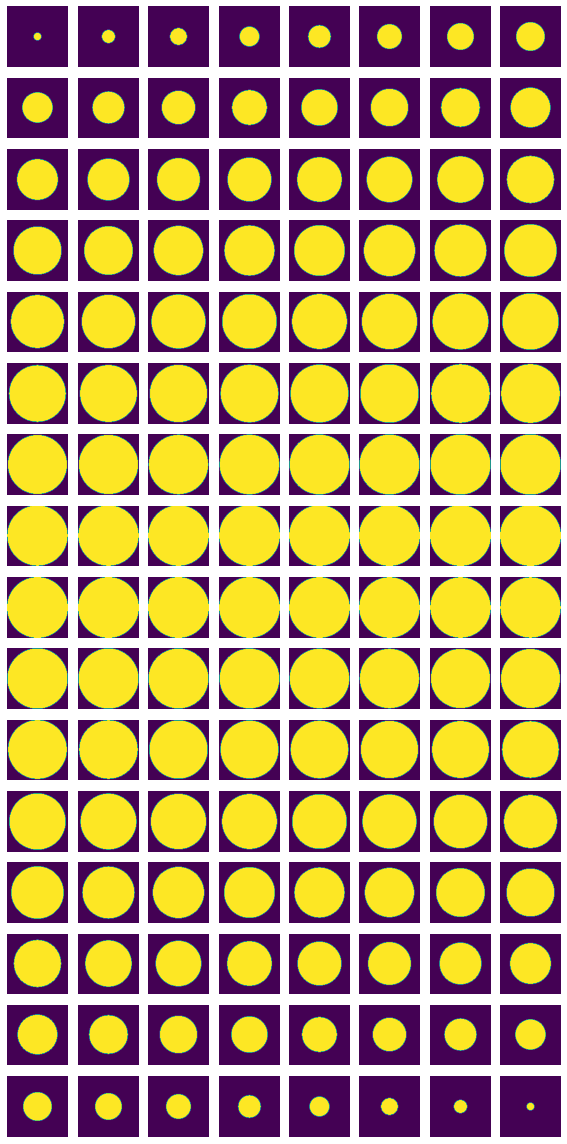

In [472]:
plt.figure(figsize=(8,binsize//8), tight_layout=True)
for i in range(binsize):
    plt.subplot(binsize//8, 8, i+1)
    plt.imshow(q.reshape(*(binsize,)*3)[i])
    plt.axis('off')

In [473]:
mask = bins[:, 0] > 0
cube_bins = bins
sph_bins = bins[is_shape]

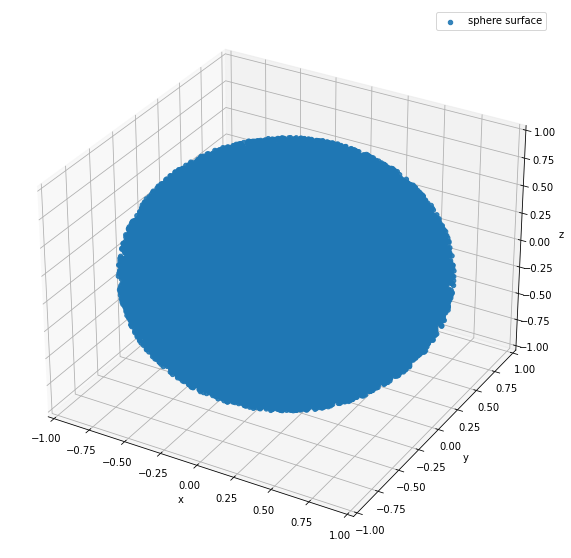

In [474]:
every = 16
fig = plt.figure(figsize=(20,10), )
ax2 = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.scatter(bins[is_sphere,0], bins[is_sphere,1], bins[is_sphere,2], s=2, alpha=0.5, label='sphere surface')
# ax.scatter(bins[is_cube,0], bins[is_cube,1], bins[is_cube,2], s=2, alpha=0.5, label='cube surface')
# ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
# ax2.scatter(cube_bins[::every,0], cube_bins[::every,1], cube_bins[::every,2], s=1, alpha=0.1, label='cube surface')
ax2.scatter(sph_bins[::every, 0], sph_bins[::every, 1], sph_bins[::every, 2], s=20, alpha=0.9, label='sphere surface')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_zlim(-1, 1)
plt.legend()
plt.show()

In [475]:
np.save(f'bins_{shape}_{binsize}.npy', bins)
np.save(f'p_{shape}_{binsize}.npy', p)
np.save(f'q_{shape}_{binsize}.npy', q)

In [508]:
bins = np.load(f'bins_{shape}_{binsize}.npy', allow_pickle=True)
p = np.load(f'p_{shape}_{binsize}.npy', allow_pickle=True)
q = np.load(f'q_{shape}_{binsize}.npy', allow_pickle=True)

Starting iterative process
#iterations=14, early stopping: eps, err=6.563249833994521e-19, 2617.370ms per iteration
Finished


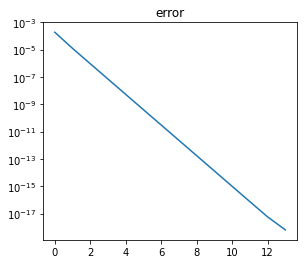

In [510]:
beta = 0.25
num_iter = 200
K, a, b, _, _, _ = tinkhorn.sinkhorn_toeplitz(p, q, bin_size=bins, beta=beta,
                                            max_iter=num_iter, store_full=False, plot=1,
                                             eps=1e-18, tol=1e-18)

In [511]:
np.save('K_toeplitz.npy', K)
np.save('a_toeplitz.npy', a)
np.save('b_toeplitz.npy', b)

In [512]:
xbins, ybins = bins[p.ravel() > 0], bins[q.ravel() > 0]
# hat_xbins = bins[transport][p.ravel() > 0]

In [515]:
hat_xbins = np.load(f'source_image_{shape}_{binsize}.npy', allow_pickle=True)#[p.ravel()>0] 

In [516]:
hat_xbins.max()

0.5908906898729346

In [520]:
hat_xbins /= hat_xbins.max() 
hat_xbins *= sph_bins.max()

In [579]:
np.max(np.vstack([hat_xbins.max(-2), ybins.max(-2)]), -2)

array([0.9921875, 0.9921875, 0.9921875])

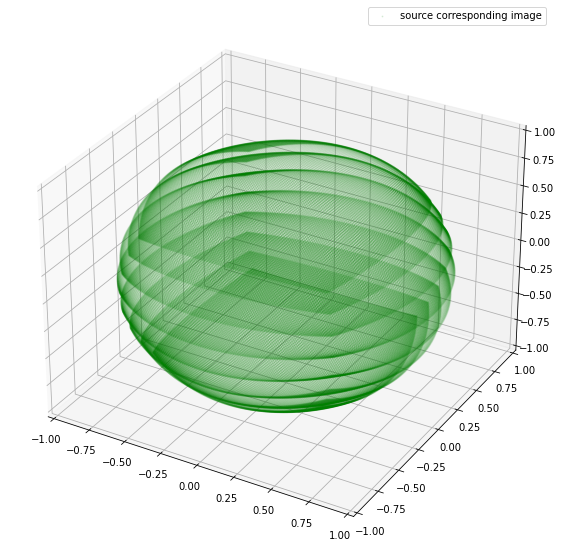

In [521]:
every = 16
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(projection='3d')
# x, y, z = xbins[:, 0], xbins[:, 1], xbins[:, 2]
# u, v, w = hat_xbins[:, 0] - xbins[:, 0], hat_xbins[:, 1] - xbins[:, 1], hat_xbins[:, 2] - xbins[:, 2]
# ax.scatter(ybins[::every,0], ybins[::every,1], ybins[::every,2],
#            s=2, alpha=0.25, c='r', label='target')
ax.scatter(hat_xbins[::every,0], hat_xbins[::every,1], hat_xbins[::every,2], 
           s=1, alpha=0.1, c='g', label='source corresponding image')
# ax.scatter(bbb[:, 0], bbb[:, 1], bbb[:, 2])
# ax.scatter(bbbb[:, 0], bbbb[:, 1], bbbb[:, 2])
# ax.quiver(x, y, z, u, v, w, alpha=0.1, color='k')
ax.legend(bbox_to_anchor=(1., 1.01))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
# plt.savefig('cube_to_sphere.png')
plt.show()

100%|██████████| 5/5 [00:00<00:00, 55.29it/s]


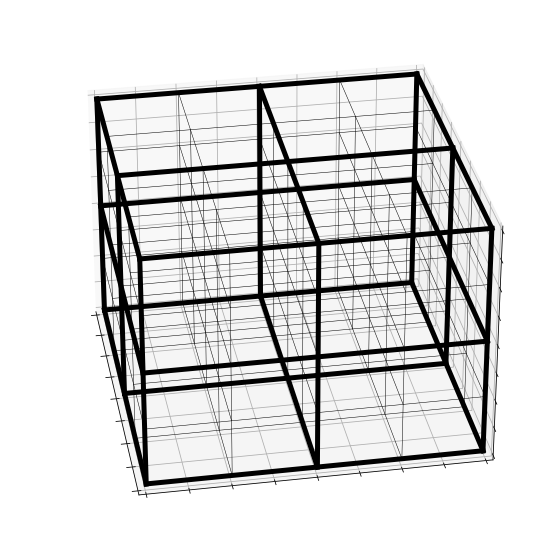

In [563]:
plot_3d_mesh(p, bins, 32, True)

100%|██████████| 5/5 [00:00<00:00, 34.58it/s]


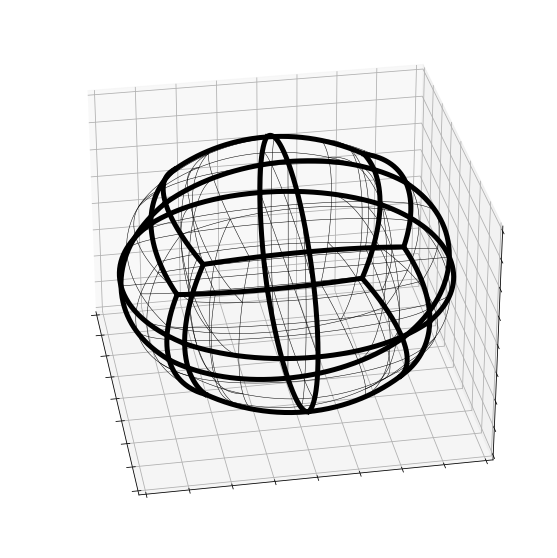

In [564]:
plot_3d_mesh(p, hat_xbins, 32, True)

## Clouds experiments with number of bins

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=2**10, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=512, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=256, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=64, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=32, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=16, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=8, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=4, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=2, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)